# Kaggle经典案例-泰坦尼克号问题

本质是一个二分类问题，根据乘客信息判断是否幸存<br>
基本步骤<br>
数据清洗<br>
特征工程（提特征）<br>
搭建模型<br>
调参

# 简单了解数据

## 看数据有哪些属性

In [1]:
import pandas as pd #数据分析
import numpy as np #科学计算
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)
%matplotlib inline

data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


大概了解一下数据，有以下几个字段：<br>
PassengerId => 乘客ID<br>
Pclass => 乘客等级(1/2/3等舱位)<br>
Name => 乘客姓名<br>
Sex => 性别<br>
Age => 年龄<br>
SibSp => 堂兄弟/妹个数<br>
Parch => 父母与小孩个数<br>
Ticket => 船票信息<br>
Fare => 票价<br>
Cabin => 客舱<br>
Embarked => 登船港口<br>

## 查看简单的汇总信息

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.shape

(891, 12)

In [9]:
data.describe()

C:\Users\Administrator\AppData\Roaming\Python\Python35\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 分析

训练数据中总共有891名乘客，但有些属性的数据缺失，比如说：

Age（年龄）属性只有714名乘客有记录<br>
Cabin（客舱）只有204名乘客是已知的，缺失比较严重<br>
Embarked（港口）也有3个缺失<br>

数值型数据的一些分布：<br>
mean字段告诉我们，大概0.383838的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7岁(计算这个时候会略掉无记录的)等等…

# 仔细了解数据，看看各个属性和结果的关系

分析每个属性和结果的关系，考虑将有强相关的属性作为特征<br>
将当前考虑的属性作为横坐标<br>

## 每个/多个属性和Survived间的关系

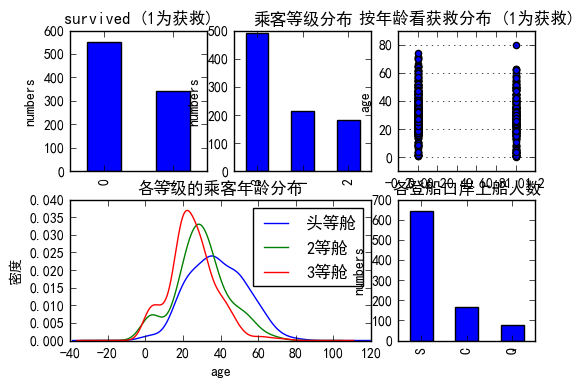

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data.Survived.value_counts().plot(kind='bar')# plots a bar graph of those who surived vs those who did not. 
plt.title(u"survived (1为获救)") # puts a title on our graph
plt.ylabel(u"numbers")  

plt.subplot2grid((2,3),(0,1))
data.Pclass.value_counts().plot(kind="bar")
plt.ylabel(u"numbers")
plt.title(u"乘客等级分布")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data.Survived, data.Age)
plt.ylabel(u"age")                         # sets the y axis lable
plt.grid(b=True, which='major', axis='y') # formats the grid line style of our graphs
plt.title(u"按年龄看获救分布 (1为获救)")


plt.subplot2grid((2,3),(1,0), colspan=2)
data.Age[data.Pclass == 1].plot(kind='kde')   # plots a kernel desnsity estimate of the subset of the 1st class passanges's age
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
plt.xlabel(u"age")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"numbers")  
plt.show()

分析：<br>
被救的人300多，不到半数；<br>
3等舱乘客灰常多；遇难和获救的人年龄似乎跨度都很广；<br>
3个不同的舱年龄总体趋势似乎也一致，2/3等舱乘客20岁多点的人最多，1等舱40岁左右的最多；
登船港口人数按照S、C、Q递减，而且S远多于另外俩港口。<br>

一些想法：

不同舱位/乘客等级可能和财富/地位有关系，最后获救概率可能会不一样
年龄对获救概率也一定是有影响的
和登船港口是不是有关系呢？也许登船港口不同，人的出身地位不同？
需要再来统计统计，看看这些属性值的统计分布。

## 看乘客等级对获救的影响

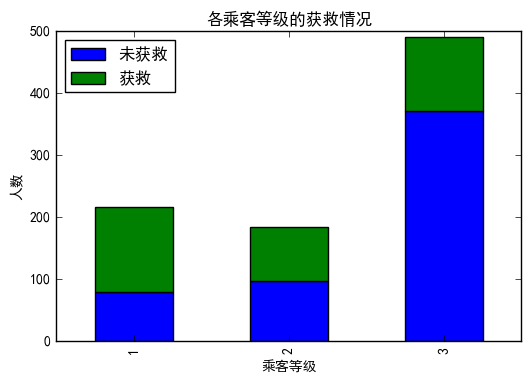

In [15]:
#看看各乘客等级的获救情况
#不同等级、不同获救情况的计数
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Pclass[data.Survived == 0].value_counts()
Survived_1 = data.Pclass[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各乘客等级的获救情况")
plt.xlabel(u"乘客等级") 
plt.ylabel(u"人数") 

plt.show()

得到这个图：

等级为1的乘客，获救的概率高很多。所以，这个一定是影响最后获救结果的一个特征。

## 各登陆港口对获救的影响

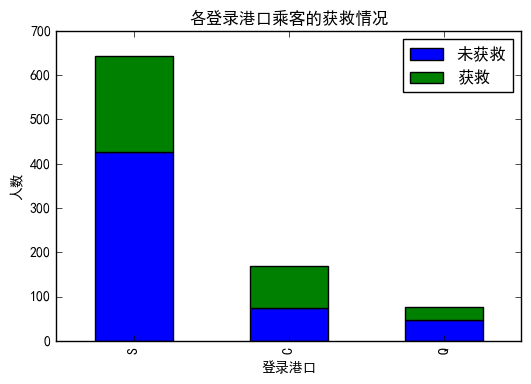

In [18]:
#看看各登陆港口的获救情况
#不同港口、不同获救情况的计数
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 

plt.show()

暂时分析不出什么

## 性别对获救的影响

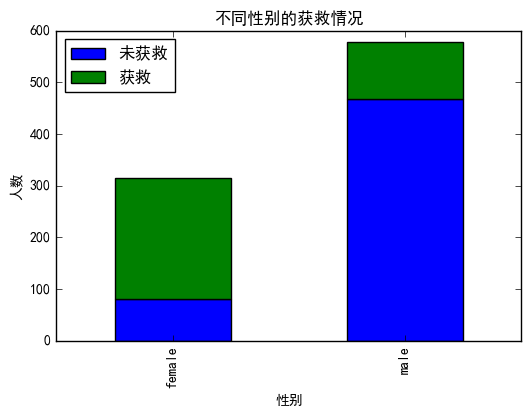

In [21]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_0 = data.Sex[data.Survived == 0].value_counts()
Survived_1 = data.Sex[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"不同性别的获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数") 

plt.show()

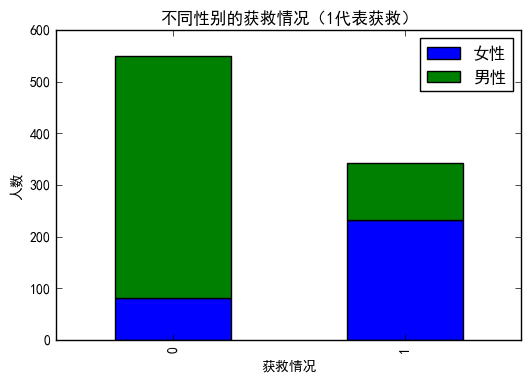

In [24]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data.Survived[data.Sex == 'male'].value_counts()
Survived_f = data.Survived[data.Sex == 'female'].value_counts()
df=pd.DataFrame({u'女性':Survived_f, u'男性':Survived_m})
df.plot(kind='bar', stacked=True)
plt.title(u"不同性别的获救情况（1代表获救）")
plt.xlabel(u"获救情况") 
plt.ylabel(u"人数") 

plt.show()

可以看出，获救的大部分是女性，性别无疑也要作为重要特征加入最后的模型之中。

## 各种舱级别情况下各性别的获救情况

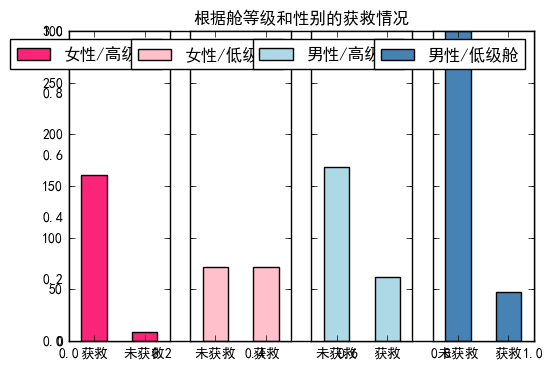

In [26]:
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")

ax1=fig.add_subplot(141)
data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0)
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"未获救", u"获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

可以看到高级仓的获救率更高，高级仓的女性获救更高

## 堂兄弟和父母对获救的影响

### 堂兄弟

In [30]:
df_b = data.groupby(['Survived','SibSp']).count()
df_b

PassengerId  Pclass  Name  Sex  Age  Parch  Ticket  Fare  \
Survived SibSp                                                             
0        0              398     398   398  398  296    398     398   398   
         1               97      97    97   97   86     97      97    97   
         2               15      15    15   15   14     15      15    15   
         3               12      12    12   12    8     12      12    12   
         4               15      15    15   15   15     15      15    15   
         5                5       5     5    5    5      5       5     5   
         8                7       7     7    7    0      7       7     7   
1        0              210     210   210  210  175    210     210   210   
         1              112     112   112  112   97    112     112   112   
         2               13      13    13   13   11     13      13    13   
         3                4       4     4    4    4      4       4     4   
         4                3       3     3    3    3      3       3     3   

                Cabin  Embarked  
Survived SibSp                   
0        0         49       398  
         1         17        97  
         2          1        15  
         3          1        12  
         4          0        15  
         5          0         5  
         8          0         7  
1        0         77       208  
         1         52       112  
         2          5        13  
         3          2         4  
         4          0         3

### 父母

In [31]:
df_p = data.groupby(['Survived','Parch']).count()
df_p

PassengerId  Pclass  Name  Sex  Age  SibSp  Ticket  Fare  \
Survived Parch                                                             
0        0              445     445   445  445  335    445     445   445   
         1               53      53    53   53   49     53      53    53   
         2               40      40    40   40   29     40      40    40   
         3                2       2     2    2    2      2       2     2   
         4                4       4     4    4    4      4       4     4   
         5                4       4     4    4    4      4       4     4   
         6                1       1     1    1    1      1       1     1   
1        0              233     233   233  233  186    233     233   233   
         1               65      65    65   65   61     65      65    65   
         2               40      40    40   40   39     40      40    40   
         3                3       3     3    3    3      3       3     3   
         5                1       1     1    1    1      1       1     1   

                Cabin  Embarked  
Survived Parch                   
0        0         50       445  
         1         11        53  
         2          6        40  
         3          0         2  
         4          1         4  
         5          0         4  
         6          0         1  
1        0         91       231  
         1         28        65  
         2         17        40  
         3          0         3  
         5          0         1

没看出特别特别明显的规律(为自己的智商感到捉急…)，作为备选特征

## 缺失严重属性客舱对获救的影响

看看船票好了

ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴

cabin（客舱）只有204个乘客有值，可以看看它的一个分布

In [32]:
data.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
E101               3
F2                 3
D                  3
F33                3
C22 C26            3
C124               2
F G73              2
E33                2
E24                2
D36                2
E67                2
E121               2
B57 B59 B63 B66    2
B35                2
C83                2
D35                2
B28                2
B5                 2
C65                2
B18                2
B49                2
B22                2
C123               2
C78                2
D26                2
C2                 2
E44                2
                  ..
A32                1
C62 C64            1
A19                1
E68                1
B37                1
A23                1
B82 B84            1
F E69              1
B78                1
E36                1
B101               1
B4                 1
E31                1
D30                1
C45                1
C49                1
E38          

数据非常不集中

Cabin属性，应该算作类目型的，缺失值非常多，还如此不集中，如果直接按照类目特征处理的话，太散了，估计每个因子化后的特征都拿不到什么权重。加上有那么多缺失值，我们先把Cabin缺失与否作为条件(虽然这部分信息缺失可能并非未登记，maybe只是丢失了而已，所以这样做未必妥当)，先在有无Cabin信息这个粗粒度上看看Survived的情况好了。

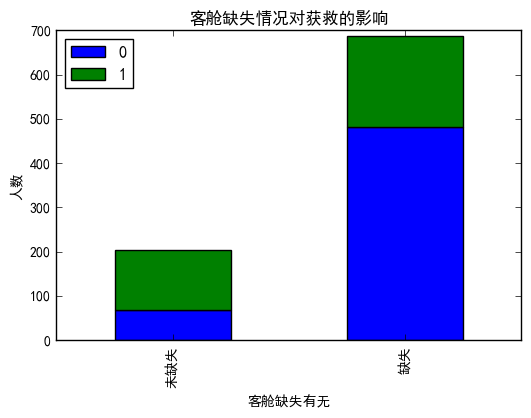

In [38]:
#有无客舱信息对获救情况的影响
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_y = data.Survived[pd.notnull(data.Cabin)].value_counts()
Survived_n = data.Survived[pd.isnull(data.Cabin)].value_counts()
df=pd.DataFrame({u'未缺失':Survived_y, u'缺失':Survived_n}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"客舱缺失情况对获救的影响")
plt.xlabel(u"客舱缺失有无") 
plt.ylabel(u"人数") 

plt.show()

可以看到，未获救人的客舱信息大多缺失。有客舱记录的似乎获救概率稍高一些，这个属性先放一放。暂时按Cabin有无数据，将这个属性处理成Yes和No两种类型。

# 数据清洗-对缺失值填充

对于有缺失值属性Age：

通常遇到缺值的情况，有几种常见的处理方式

1.如果缺值的样本占总数比例极高，可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果<br>
2.如果缺值的样本适中，而该属性是非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中<br>
3.如果缺值的样本适中，而该属性是连续值特征属性，有时候会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。<br>
4.有些情况下，缺失的值个数并不是特别多，也可以试着根据已有的值，拟合一下数据，补充上。<br>
本例中，后两种处理方式应该都是可行的，我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)<br>
这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据

In [80]:
# 使用 RandomForestClassifier 填补缺失的年龄属性
#根据其他数值型属性来进行回归预测，已知age的数据作为label
from sklearn.ensemble import RandomForestRegressor
def fit_missing_age(df):
    #1.切分数据，构建训练集和测试集
    # 把已有的数值型特征取出来
    age_df =  df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    # 分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    x = known_age[:,1:] # x即特征属性值
    y = known_age[:,0] # y即目标年龄
    x_test = unknown_age[:,1:]
    
    #2.模型训练
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(x,y)
    
    #3.用得到的模型进行未知年龄结果预测 
    age_pre = rfr.predict(x_test)
    
    # 将预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),'Age'] = age_pre
    
    return df,rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data,rfr = fit_missing_age(data)
data = set_Cabin_type(data)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.838953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


# 特征工程-预处理

## 类别型- one-hot

逻辑回归建模时，需要输入的特征都是数值型特征，通常会先对类别型的特征因子化/one-hot编码。 <br>
什么叫做因子化/one-hot编码？举个例子：<br>
以Embarked为例，原本一个属性维度，因为其取值可以是[‘S’,’C’,’Q‘]，而将其平展开为’Embarked_C’,’Embarked_S’,<br> ‘Embarked_Q’三个属性<br>
原本Embarked取值为S的，在此处的”Embarked_S”下取值为1，在’Embarked_C’, ‘Embarked_Q’下取值为0<br>
原本Embarked取值为C的，在此处的”Embarked_C”下取值为1，在’Embarked_S’, ‘Embarked_Q’下取值为0<br>
原本Embarked取值为Q的，在此处的”Embarked_Q”下取值为1，在’Embarked_C’, ‘Embarked_S’下取值为0<br>
我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上，如下所示。

In [81]:
#prefix :String to append DataFrame column names
#prefix_sep : str, default ‘_’:If appending prefix, separator/delimiter to use
dummies_Cabin = pd.get_dummies(data['Cabin'],prefix ='Cabin')
dummies_Embarked = pd.get_dummies(data['Embarked'],prefix ='Embarked')
dummies_Sex = pd.get_dummies(data['Sex'],prefix ='Sex')
dummies_Pclass = pd.get_dummies(data['Pclass'],prefix ='Pclass')

df = pd.concat([data,dummies_Cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
df.drop(['Cabin','Embarked','Sex','Pclass'],axis=1,inplace=True)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,6,0,"Moran, Mr. James",23.838953,0,0,330877,8.4583,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,7,0,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
7,8,0,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## 数值型- 标准化

对于数值型Age和Fare两个属性，数值幅度变化太大。对于逻辑回归与梯度下降，各属性值之间scale差距太大，将对收敛速度造成几万点伤害值！甚至不收敛！<br>
所以用scikit-learn里面的preprocessing模块对数据做一个scaling，将一些变化幅度较大的特征化到[-1,1]之内。

In [82]:
import sklearn.preprocessing as preprocessing
#在最后加两列标准化之后的结果

age_scale_param = scaler.fit(df['Age'].reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].reshape(-1,1),age_scale_param)

fare_scale_param = scaler.fit(df['Fare'].reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].reshape(-1,1),fare_scale_param)
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.561380,-0.502445
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.613171,0.786845
2,3,1,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.267742,-0.488854
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.392942,0.420730
4,5,0,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.392942,-0.486337
5,6,0,"Moran, Mr. James",23.838953,0,0,330877,8.4583,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.426384,-0.478116
6,7,0,"McCarthy, Mr. Timothy J",54.000000,0,0,17463,51.8625,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.787722,0.395814
7,8,0,"Palsson, Master. Gosta Leonard",2.000000,3,1,349909,21.0750,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-2.029569,-0.224083
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.000000,0,2,347742,11.1333,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.194333,-0.424256
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",14.000000,1,0,237736,30.0708,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.148655,-0.042956


## 特征抽取

把需要的feature字段取出来，转成numpy-矩阵格式。

In [83]:
#抽取需要的属性作为特征
#regex:正则表达式
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#将dataframe 转 array
train_np = train_df.as_matrix()

# 构建训练集样本和标签

In [84]:
y = train_np[:,0]
x =train_np[:,1:]

# 模型训练

In [85]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(x,y)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=1e-06, verbose=0,
                   warm_start=False)

In [86]:
x.shape

(891, 14)

# 对测试集操作

接下来对训练集和测试集做一样的操作,要用原来的模型，无论是标准化还是缺失值填充<br>

In [112]:
data_test = pd.read_csv("test.csv")
data_test.head(11)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [91]:
data_test.shape

(418, 11)

In [103]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


注意:1.数值型Fare有缺失，fit_missing_age()里面包含随机森林模型，不能有缺失数据<br>2.丢进模型里的数据要转np-matrix？<br>
但是我们不能使用fit_missing_age()函数，而是要用已经拟合好的训练集同样的RandomForestRegressor模型，来填充丢失的age信息<br>
这就要求fit_missing_age()函数返回的rfr模型了


In [113]:
#注意:数值型fare有缺失，fit_missing_age()里面包含随机森林模型，不能有缺失数据
data_test = set_Cabin_type(data_test)

data_test.loc[(data_test.Fare.isnull()),'Fare']=0

#同样的先筛选属性来预测age_test值
age_data = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
unknown_age = age_data[age_data.Age.isnull()].as_matrix()
unknown_age = unknown_age[:,1:]
age_test_pre = rfr.predict(unknown_age)
data_test.loc[(data_test.Age.isnull()),'Age'] = age_test_pre
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,No,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,No,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,No,Q
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,No,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,No,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.000000,0,0,7538,9.2250,No,S
6,898,3,"Connolly, Miss. Kate",female,30.000000,0,0,330972,7.6292,No,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.000000,1,1,248738,29.0000,No,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.000000,0,0,2657,7.2292,No,C
9,901,3,"Davies, Mr. John Samuel",male,21.000000,2,0,A/4 48871,24.1500,No,S


In [115]:
dummies_cabin = pd.get_dummies(data_test['Cabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'],prefix='Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'],prefix='Pclass')

test = pd.concat([data_test,dummies_cabin,dummies_Embarked,dummies_Sex,dummies_Pclass],axis=1)
test.drop(['Cabin','Embarked','Sex','Pclass'],axis=1,inplace=True)
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


同样的，对测试集的标准化也要用原来训练集的模型，而不是根据测试集拟合的

In [116]:
#用原来的模型
test['Age_scaled'] = scaler.fit_transform(test['Age'].reshape(-1,1),age_scale_param)
test['Fare_scaled'] = scaler.fit_transform(test['Fare'].reshape(-1,1),fare_scale_param)
test

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,"Kelly, Mr. James",34.500000,0,0,330911,7.8292,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.367101,-0.496637
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.000000,1,0,363272,7.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.331237,-0.511497
2,894,"Myles, Mr. Thomas Francis",62.000000,0,0,240276,9.6875,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.488200,-0.463335
3,895,"Wirz, Mr. Albert",27.000000,0,0,315154,8.6625,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.211380,-0.481704
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.000000,1,1,3101298,12.2875,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.597035,-0.416740
5,897,"Svensson, Mr. Johan Cervin",14.000000,0,0,7538,9.2250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-1.214082,-0.471623
6,898,"Connolly, Miss. Kate",30.000000,0,0,330972,7.6292,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.020012,-0.500221
7,899,"Caldwell, Mr. Albert Francis",26.000000,1,1,248738,29.0000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.288511,-0.117238
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",18.000000,0,0,2657,7.2292,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.905558,-0.507390
9,901,"Davies, Mr. John Samuel",21.000000,2,0,A/4 48871,24.1500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.674166,-0.204154


In [117]:
test = test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
test_pre = clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':test_pre.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [119]:
pd.read_csv("logistic_regression_predictions.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# 要判定一下当前模型所处状态(欠拟合or过拟合)

有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。

对于过拟合和欠拟合两种情形。优化的方式是不同的。

对过拟合而言，通常以下策略对结果优化是有用的：

1.做一下feature selection，挑出较好的feature的subset来做training
2.提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确

对欠拟合而言，通常需要更多的feature，更复杂的模型来提高准确度。

著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态：过拟合(overfitting/high variace)，欠拟合(underfitting/high bias)

也可以把错误率替换成准确率(得分)，得到另一种形式的learning curve(sklearn 里面是这么做的)。

对于我们的问题，我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。举个例子，这里我们一起画一下我们最先得到的baseline model的learning curve。

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Fut

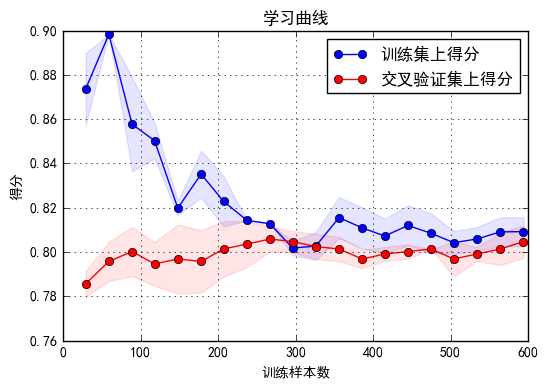

(0.8065696844854024, 0.018258876711338634)

In [121]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, u"学习曲线", x, y)

可以大致看出来，训练集和交叉验证集上的得分曲线走势还是符合预期的。我们的model并不处于overfitting的状态(overfitting的表现一般是训练集上得分高，而交叉验证集上要低很多，中间的gap比较大)。因此我们可以再做些feature engineering的工作，添加一些新产出的特征或者组合特征到模型中。这只是我们简单分析过后出的一个baseline系统

# 优化baseline

我们还有些特征可以再挖掘

1. 比如说Name和Ticket两个属性被我们完整舍弃了(对于这种，每一条记录都是一个完全不同的值的属性，并没有很直接的处理方式)
2. 比如说，年龄的拟合本身也未必是一件非常靠谱的事情
3. 另外，以我们的日常经验，小盆友和老人可能得到的照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，似乎体现不出两头受照顾的实际情况，所以，说不定我们把年龄离散化，按区段分作类别属性会更合适一些
那怎么样才知道，哪些地方可以优化，哪些优化的方法是promising的呢？
是的

要做交叉验证(cross validation)!

因为test.csv里面并没有Survived这个字段，我们无法在这份数据上评定我们算法在该场景下的效果。<br>
通常情况下，做cross validation：把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据上看我们预测算法的效果。<br>
我们可以用scikit-learn的cross_validation来完成这个工作<br>
在此之前，咱们可以看看现在得到的模型的系数，因为系数和它们最终的判定能力强弱是正相关的

## 看特征的系数判断相关度

In [122]:
#coef_：是wx+b中的w，每个特征前的参数
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.3442357950408179],SibSp
1,[-0.10491612638081226],Parch
2,[-0.031869681092370164],Cabin_No
3,[0.8702377710799999],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.41726428334696264],Embarked_S
7,[1.988442070665339],Sex_female
8,[-0.6455498063547432],Sex_male
9,[0.34115833342921753],Pclass_1


上面的系数和最后的结果是一个正相关的关系
我们先看看那些权重绝对值非常大的feature，在我们的模型上：

1.Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。<br>
2.Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。<br>
3.有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)<br>
4.Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）<br>
5.有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。<br>
6.船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够.举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)<br>
观察完，我们现在有一些想法了，但是怎么样才知道，哪些优化的方法是promising的呢？<br>

这就要靠交叉验证

## 交叉验证-考虑细化的特征

In [146]:
from sklearn.model_selection import cross_val_score

# 先简单看看交叉验证的打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
x = all_data.as_matrix()[:,1:]
y = all_data.as_matrix()[:,0]
print(cross_val_score(clf, x, y, cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [147]:
#切分训练集和验证集
#注意：dataframe切分得先转numpy-array
from sklearn.model_selection import train_test_split
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 生成模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [163]:
split_cv['cv_pre'] =predictions
#new =split_cv.filter(['PassengerId','Survived','cv_pre'])
#new[new['Survived'] !=new['cv_pre']]
bad = split_cv[split_cv['Survived']!= split_cv['cv_pre']]
bad

D:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin_No,Cabin_Yes,...,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled,cv_pre
298,299,1,"Saalfeld, Mr. Adolphe",41.574877,0,0,19988,30.5000,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.875600,-0.034314,0.0
14,15,0,"Vestrom, Miss. Hulda Amanda Adolfina",14.000000,0,0,350406,7.8542,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.148655,-0.490280,1.0
803,804,1,"Thomas, Master. Assad Alexander",0.420000,0,1,2625,8.5167,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-2.145556,-0.476941,0.0
474,475,0,"Strandberg, Miss. Ida Sofia",22.000000,0,0,7553,9.8375,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.561380,-0.450347,1.0
642,643,0,"Skoog, Miss. Margit Elizabeth",2.000000,3,2,347088,27.9000,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-2.029569,-0.086664,1.0
55,56,1,"Woolner, Mr. Hugh",44.064830,0,0,19947,35.5000,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.058386,0.066360,0.0
587,588,1,"Frolicher-Stehli, Mr. Maxmillian",60.000000,1,1,13567,79.2000,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.228178,0.946246,0.0
740,741,1,"Hawksford, Mr. Walter James",38.426632,0,0,16988,30.0000,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.644490,-0.044381,0.0
839,840,1,"Marechal, Mr. Pierre",50.910950,0,0,11774,29.7000,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.560956,-0.050421,0.0
301,302,1,"McCoy, Mr. Bernard",23.313683,2,0,367226,23.2500,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.464943,-0.180290,0.0


对比bad cases，我们仔细看看我们预测错的样本，到底是哪些特征有问题，处理得还不够细？<br>
随便列一些可能可以做的优化操作：<br>
1.Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。<br>
2.Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。<br>
3.Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分和后面的数字部分(如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。<br>
4.Pclass和Sex俩太重要了，试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。<br>
5.单加一个Child字段，Age<=12的，设为1，其余为0(数据显示小盆友优先程度很高)<br>
6.如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0<br>
7.登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点奇怪)<br>
8.把堂兄弟/兄妹和Parch，还有自己个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)<br>
9.Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。<br>
还可以接着往下挖掘，可能还可以想到更多可以细挖的部分。先列这些，然后可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。<br>

## 优化特征

In [3]:
#选出名字包含某一个字符的样本
data[data['Name'].str.contains("Major")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S


### 性别_等级组合特征

In [48]:
data_train = pd.read_csv("train.csv")
#map(function, iterable, …)，它的返回结果是一个列表
data_train['Sex_Pclass'] = data_train.Sex + "_" + data_train.Pclass.map(str)

In [49]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3


### Name特征处理

In [50]:
#处理特殊的称呼，全处理成mr, mrs, miss, master
#将Name里面包含mr, mrs, miss, master等提出，作为Title字段的值
#map() 将函数作用于一个Series的每一个元素
#apply() 函数作用在一维的向量上时（行或列）

#找子串，find()如果没有这个子串返回 -1
def substrings_in_string(big_string, substrings):
    for substr in substrings:
        if str.find(big_string,substr)!=-1:
            return substr
    return np.nan
    
def title(df):
    #先将mr, mrs, miss, master等提出来
    title_list=['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
                'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
                'Don', 'Jonkheer']
    df['Title'] = df['Name'].map(lambda x: substrings_in_string(x,title_list))
    
    #再处理特殊的称呼，全处理成mr, mrs, miss, master
    #传入的x是df的一行数据
    def replace_titles(x):
        title=x['Title']
        if title in ['Mr','Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
            return 'Mr'
        elif title in ['Master']:
            return 'Master'
        elif title in ['Countess', 'Mme','Mrs']:
            return 'Mrs'
        elif title in ['Mlle', 'Ms','Miss']:
            return 'Miss'
        elif title =='Dr':
            if x['Sex'] == 'Male':
                return 'Mr'
            else:
                return 'Mrs'
        elif title =='':
            if x['Sex']=='Male':
                return 'Master'
            else:
                return 'Miss'
        else:
            return title 
    df['Title'] = df.apply(replace_titles,axis=1)
    
title(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3,Mr


### Family特征处理

In [51]:
#看看家族是否够大
def family(df):
    df['Family_Size'] = df['SibSp']+df['Parch']
    df['Family']=df['SibSp']*df['Parch']
    
family(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Title,Family_Size,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3,Mr,0,0


### Fare特征处理

In [52]:
#将为0的样本用不同等级Fare的中位数填充
def fare(df):
    #先将0转nan
    df.Fare = df.Fare.map(lambda x:np.nan if x==0 else x)
    
    df.loc[ (df.Fare.isnull())&(df.Pclass==1),'Fare'] = np.median(df[df['Pclass']==1]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==2),'Fare'] = np.median(df[df['Pclass']==2]['Fare'].dropna())
    df.loc[ (df.Fare.isnull())&(df.Pclass==3),'Fare'] = np.median(df[df['Pclass']==3]['Fare'].dropna())

fare(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Title,Family_Size,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3,Mr,0,0


### AgeFill特征处理-缺失值用均值填充

In [53]:
#用不同年龄段的均值填充
def agefill(df):
    df['AgeFill']=df['Age']
    
    df.loc[ (df.Age.isnull())&(df.Title=='Miss'),'AgeFill'] = np.average(df[df['Title']=='Miss']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mrs') ,'AgeFill'] = np.average(df[df['Title'] == 'Mrs']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Mr') ,'AgeFill'] = np.average(df[df['Title'] == 'Mr']['Age'].dropna())
    df.loc[ (df.Age.isnull()) & (df.Title == 'Master') ,'AgeFill'] = np.average(df[df['Title'] == 'Master']['Age'].dropna())
agefill(data_train)
data_train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Title,Family_Size,Family,AgeFill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3,Mr,1,0,22.00000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1,Mrs,1,0,38.00000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3,Miss,0,0,26.00000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1,Mrs,1,0,35.00000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3,Mr,0,0,35.00000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male_3,Mr,0,0,32.89199


### AgeCat特征处理

In [54]:
def agecat(df):
    df['AgeCat'] = df['AgeFill']
    df.loc[(df.AgeFill<=10),'AgeCat'] = 'child'
    df.loc[ (df.AgeFill>60),'AgeCat'] = 'aged'
    df.loc[ (df.AgeFill>10) & (df.AgeFill <=30) ,'AgeCat'] = 'adult'
    df.loc[ (df.AgeFill>30) & (df.AgeFill <=60) ,'AgeCat'] = 'senior'
agecat(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Title,Family_Size,Family,AgeFill,AgeCat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male_3,Mr,1,0,22.0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female_1,Mrs,1,0,38.0,senior
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female_3,Miss,0,0,26.0,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female_1,Mrs,1,0,35.0,senior
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male_3,Mr,0,0,35.0,senior


### Gender特征/Embarked特征/Cabin特征处理

In [55]:
def gender(df):
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
def embark(df):
    df.Embarked = df.Embarked.fillna('S')
def cabin(df):
    df.loc[ df.Cabin.isnull()==True,'Cabin'] = 0.5
    df.loc[ df.Cabin.isnull()==False,'Cabin'] = 1.5
    
gender(data_train)
embark(data_train)
cabin(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Title,Family_Size,Family,AgeFill,AgeCat,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1.5,S,male_3,Mr,1,0,22.0,adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1.5,C,female_1,Mrs,1,0,38.0,senior,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1.5,S,female_3,Miss,0,0,26.0,adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1.5,S,female_1,Mrs,1,0,35.0,senior,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1.5,S,male_3,Mr,0,0,35.0,senior,1


### 其他特征

In [56]:
def fare_per_person(df):
    df['Fare_Per_Person']=df['Fare']/(df['Family_Size']+1)
def ageclass(df):
    #Age times class
    df['AgeClass']=df['AgeFill']*df['Pclass']
def classfare(df):
    df['ClassFare']=df['Pclass']*df['Fare_Per_Person']
def highlow(df):
    df['HighLow']=df['Pclass']
    df.loc[ (df.Fare_Per_Person<8) ,'HighLow'] = 'Low'
    df.loc[ (df.Fare_Per_Person>=8) ,'HighLow'] = 'High'
fare_per_person(data_train)
ageclass(data_train)
classfare(data_train)
highlow(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Family_Size,Family,AgeFill,AgeCat,Gender,Fare_Per_Person,AgeClass,ClassFare,HighLow
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,1,0,22.0,adult,1,3.62500,66.0,10.87500,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,Mrs,1,0,38.0,senior,0,35.64165,38.0,35.64165,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,Miss,0,0,26.0,adult,0,7.92500,78.0,23.77500,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,Mrs,1,0,35.0,senior,0,26.55000,35.0,26.55000,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,Mr,0,0,35.0,senior,1,8.05000,105.0,24.15000,High


### 预处理-对类别型

In [57]:
from sklearn import preprocessing
#根据类别做encoder，第一类是0，第二类是1...
def prepro(df):
    le = preprocessing.LabelEncoder()
    
    le.fit(df['Sex'] )
    x_sex=le.transform(df['Sex'])
    df['Sex']=x_sex.astype(np.float)
    
    le.fit( df['Ticket'])
    x_Ticket=le.transform( df['Ticket'])
    df['Ticket']=x_Ticket.astype(np.float)
    
    le.fit(df['Title'])
    x_title=le.transform(df['Title'])
    df['Title'] =x_title.astype(np.float)
    
    le.fit(df['HighLow'])
    x_hl=le.transform(df['HighLow'])
    df['HighLow']=x_hl.astype(np.float)
    
    le.fit(df['AgeCat'])
    x_age=le.transform(df['AgeCat'])
    df['AgeCat'] =x_age.astype(np.float)
    
    le.fit(df['Embarked'])
    x_emb=le.transform(df['Embarked'])
    df['Embarked']=x_emb.astype(np.float)
    
    le.fit(df['Sex_Pclass'] )
    x_sex_class=le.transform(df['Sex_Pclass'])
    df['Sex_Pclass']=x_sex_class.astype(np.float)
    
prepro(data_train)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Family_Size,Family,AgeFill,AgeCat,Gender,Fare_Per_Person,AgeClass,ClassFare,HighLow
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,523.0,7.2500,...,2.0,1,0,22.0,0.0,1,3.62500,66.0,10.87500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,596.0,71.2833,...,3.0,1,0,38.0,3.0,0,35.64165,38.0,35.64165,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,669.0,7.9250,...,1.0,0,0,26.0,0.0,0,7.92500,78.0,23.77500,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,49.0,53.1000,...,3.0,1,0,35.0,3.0,0,26.55000,35.0,26.55000,0.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,472.0,8.0500,...,2.0,0,0,35.0,3.0,1,8.05000,105.0,24.15000,0.0


In [58]:
data_train = data_train.drop(['PassengerId','Age','Name','Cabin'],axis=1)
data_train.head()

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Sex_Pclass,Title,Family_Size,Family,AgeFill,AgeCat,Gender,Fare_Per_Person,AgeClass,ClassFare,HighLow
0,0,3,1.0,1,0,523.0,7.2500,2.0,5.0,2.0,1,0,22.0,0.0,1,3.62500,66.0,10.87500,1.0
1,1,1,0.0,1,0,596.0,71.2833,0.0,0.0,3.0,1,0,38.0,3.0,0,35.64165,38.0,35.64165,0.0
2,1,3,0.0,0,0,669.0,7.9250,2.0,2.0,1.0,0,0,26.0,0.0,0,7.92500,78.0,23.77500,1.0
3,1,1,0.0,1,0,49.0,53.1000,2.0,0.0,3.0,1,0,35.0,3.0,0,26.55000,35.0,26.55000,0.0
4,0,3,1.0,0,0,472.0,8.0500,2.0,5.0,2.0,0,0,35.0,3.0,1,8.05000,105.0,24.15000,0.0


### 数据处理

In [59]:
#读取数据
train_file="train.csv"
MODEL_PATH="./"
test_file="test.csv"
SUBMISSION_PATH="./"
seed= 0
#traindf=pd.read_csv(train_file)
##清洗数据
#将上面所以函数 封装成一个数据处理函数
#df=clean_and_munge_data(traindf)

## 模型训练

### 构建训练集测试集

In [62]:
#Patsy的公式是有特殊格式的字符串，如： y ~ x0 + x1  前面是前面是一列 后面是一个矩阵
from patsy import dmatrices
df = data_train
formula_ml='Survived~Pclass+C(Title)+Sex+C(AgeCat)+Fare_Per_Person+Fare+Family_Size' 
y_train, x_train = dmatrices(formula_ml, data=df, return_type='dataframe')
y_train = np.asarray(y_train).ravel()

x_train.shape

(891, 12)

In [64]:
from sklearn.model_selection import train_test_split
#选择训练和测试集
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2,random_state=seed)

### 初始化分类器

In [65]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=5, min_samples_split=1,
  min_samples_leaf=1, max_features='auto',  bootstrap=False, oob_score=False, n_jobs=1, random_state=seed,
  verbose=0)

### 网格搜索

管道机制实现了对全部步骤的流式化封装和管理<br>
可放在Pipeline中的步骤可能有：

特征标准化是需要的，可作为第一个环节
既然是分类器，classifier也是少不了的，自然是最后一个环节
中间可加上比如数据降维（PCA）

pipe_lr = Pipeline([('sc', StandardScaler()),<br>
                    ('pca', PCA(n_components=2)),<br>
                    ('clf', LogisticRegression(random_state=1))<br>
                    ])

## 优化模型

一般做到后期，要进行模型优化的方法就是模型融合

最简单的模型融合大概就是这个意思，比如分类问题，当我们手头上有一堆在同一份数据集上训练得到的分类器(比如logistic regression，SVM，KNN，random forest，神经网络)，那我们让他们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。

模型融合可以比较好地缓解，训练过程中产生的过拟合问题，从而对于结果的准确度提升有一定的帮助。

既然这个时候模型没得选，那咱们就在数据上动动手脚咯。大家想想，如果模型出现过拟合现在，一定是在我们的训练上出现拟合过度造成的对吧。

那我们干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结果有一定的帮助。对，这就是常用的Bagging。

Bagging:一堆复杂模型，容易过拟合，所以不用全部的数据，将训练集分成很多set，分别训练，得到不同的模型，在综合得分

In [18]:
from sklearn.ensemble import BaggingRegressor
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()